# Clasificación I

In [80]:
import pandas as pd
import numpy as np
import plotly.express as px

#Importando todos los datos
df_afp=pd.read_csv("../Analisis-univariado/data/armed-forces-personnel.csv")
df_met=pd.read_csv("../Analisis-univariado/data/military-expenditure-total.csv")
df_mepc=pd.read_csv("../Analisis-univariado/data/military-spending-per-capita.csv")
df_ngpr=pd.read_csv("../Analisis-univariado/data/natural-gas-proved-reserves.csv")
df_opr=pd.read_csv("../Analisis-univariado/data/oil-proved-reserves.csv")

#Haciendo merge de todos los datos para no perder ni un solo dato de todas los datasets
df_all=pd.merge(df_afp,df_met,on=["Entity","Year","Code"],how="left")
df_all=pd.merge(df_all,df_mepc,on=["Entity","Year","Code"],how="left")
df_all=pd.merge(df_all,df_ngpr,on=["Entity","Year","Code"],how="left")
df_all=pd.merge(df_all,df_opr,on=["Entity","Year","Code"],how="left")
df_all.head(5)

,Entity,Code,Year,"Armed forces personnel, total",military_expenditure,military_expenditure_per_capita,Gas - Proved reserves,Oil - Proved reserves
0,Afghanistan,AFG,1985,47000,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1989,55000,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1990,58000,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1991,45000,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1992,45000,NaN,NaN,NaN,NaN


In [83]:
years=df_all["Year"].unique()
#Quiero filtrar esta lista de mi dataset
list_to_avoid=["World","Low and middle income","Middle income","Lower middle income","Upper middle income",
            "East Asia and Pacific","High income","Europe and Central Asia","South Asia","Middle East and North Africa",
            "Low income","Latin America and Caribbean","Sub-Saharan Africa","European Union","North America"]
#En este paso lo filtramos y evitamos la lista de arriba
df_afp_locochon=df_all[df_afp.Entity.str.contains('|'.join(list_to_avoid))==False]
#Aquí creamos un DataFrame vacío para hacerle merge con las mismas columnas
df_afp_topN=pd.DataFrame(columns=df_afp_locochon.columns)
#Decidimos traer 15 países por año
First_N_Values=4
for year in years:
    #Recorremos por año el dataset locochon y quitamos los NaN values, ordenamos de mayor a menor y retiramos los primers N valores
    data_per_year=df_afp_locochon.where(df_afp_locochon["Year"]==year).dropna().sort_values(by="Armed forces personnel, total",ascending=False).head(First_N_Values)
    #Procedemos a hacer el merge tipo outer para no perder ningun dato
    df_afp_topN=pd.concat([df_afp_topN,data_per_year])

#Comprobamos
df_afp_topN=df_afp_topN.reset_index(drop=True)
# df_afp_topN.iloc[0:30]
df_afp_topN.head(11)

,Entity,Code,Year,"Armed forces personnel, total",military_expenditure,military_expenditure_per_capita,Gas - Proved reserves,Oil - Proved reserves
0,China,CHN,1989.0,3900000.0,19576596590.0,9.71,1030845642089.84375,16058490753.173828
1,United States,USA,1989.0,2240000.0,663787520434.0,1288.88,4531080245971.679688,34270000457.763672
2,India,IND,1989.0,1260000.0,20917686140.0,12.38,668850004673.00415,4345399856.567383
3,Vietnam,VNM,1989.0,1250000.0,1695261693.0,6.89,0.0,109499998.390675
4,China,CHN,1990.0,3500000.0,21281576429.0,8.43,1006858348846.435547,16019714355.46875
5,United States,USA,1990.0,2180000.0,636176125531.0,1289.58,4591543197631.835938,33840000152.587891
6,India,IND,1990.0,1260000.0,20604351223.0,12.07,682500004768.371582,5563164234.161377
7,Vietnam,VNM,1990.0,1050000.0,2020644179.0,7.53,14624999836.087229,200749993.32428
8,China,CHN,1991.0,3200000.0,22620362006.0,8.22,1009680390357.971191,15513212203.979492
9,United States,USA,1991.0,2120000.0,561979012109.0,1176.14,4529616355895.996094,32145999908.447266


In [84]:
fig_scatter3d_df_topN=px.scatter_3d(df_afp_topN,x="Oil - Proved reserves",y="Gas - Proved reserves",
    z="Armed forces personnel, total", color="Entity",opacity=0.4,hover_name="Year",height=700,
    title="Reservas Probadas de Aceite y Gas del Top "+str(len(df_afp_topN["Code"].unique()))+" de países con mayor Fuerza Militar")
    #NOTA: Podemos agregar un atributo llamado text="Year" en la gráfica para que se muestren los años 
    # y se vea guapeton, la contra es que es mucha info para mostrar en una sola imágen
fig_scatter3d_df_topN.show()

Algoritmo de regresión

In [85]:
df_afp_topN.head()

,Entity,Code,Year,"Armed forces personnel, total",military_expenditure,military_expenditure_per_capita,Gas - Proved reserves,Oil - Proved reserves
0,China,CHN,1989.0,3900000.0,19576596590.0,9.71,1030845642089.84375,16058490753.173828
1,United States,USA,1989.0,2240000.0,663787520434.0,1288.88,4531080245971.679688,34270000457.763672
2,India,IND,1989.0,1260000.0,20917686140.0,12.38,668850004673.00415,4345399856.567383
3,Vietnam,VNM,1989.0,1250000.0,1695261693.0,6.89,0.0,109499998.390675
4,China,CHN,1990.0,3500000.0,21281576429.0,8.43,1006858348846.435547,16019714355.46875


In [86]:
print("Se tienen "+str(len(df_afp_topN["Code"].unique()))+" campos únicos")
print(df_afp_topN["Code"].unique())
print(df_afp_topN["Entity"].unique())

Se tienen 5 campos únicos
['CHN' 'USA' 'IND' 'VNM' 'RUS']
['China' 'United States' 'India' 'Vietnam' 'Russia']


In [87]:
#Seperamos en X e y
X = df_afp_topN.drop(["Code","Entity"], axis=1) #Elimino de mi dataset la variable a predecir
y = df_afp_topN.Entity #Defino el Target

In [88]:
y

0              China
1      United States
2              India
3            Vietnam
4              China
           ...      
119    United States
120            China
121            India
122    United States
123           Russia
Name: Entity, Length: 124, dtype: object

In [102]:
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=123)

In [103]:
X_train


,Year,"Armed forces personnel, total",military_expenditure,military_expenditure_per_capita,Gas - Proved reserves,Oil - Proved reserves
44,2000.0,3910000.0,41167343480.0,17.23,1377652406692.504883,15190299987.792969
79,2009.0,1495000.0,48841027503.0,359.54,34047798156738.28125,105563949584.960938
118,2019.0,1454000.0,65201335848.0,446.98,37556739807128.90625,107804237365.722656
110,2017.0,1454000.0,64847527603.0,459.79,37888233184814.453125,106591537475.585938
12,1992.0,3160000.0,27509248537.0,10.15,1409904122352.600098,15193110466.003418
...,...,...,...,...,...,...
102,2015.0,1490000.0,74649044319.0,458.13,34957401275634.769531,102375198364.257797
98,2014.0,1381250.0,699563841964.0,2032.77,9996812820434.570312,54962001800.537109
92,2013.0,2993000.0,165588732015.0,117.88,3374516725540.161133,24682514190.673828
66,2006.0,1498000.0,708077303466.0,1875.12,5723228454589.84375,29444000244.140625


In [104]:
print("Porcentaje de número de datos para testear: "+str(round(len(X_test)/len(X)*100,2))+"%")

Porcentaje de número de datos para testear: 40.32%


Vamos a usar el decision Tree Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo

In [106]:
#Entrenamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [107]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_train_pred

array(['China', 'Russia', 'Russia', 'Russia', 'China', 'Russia', 'China',
       'China', 'United States', 'China', 'China', 'China', 'China',
       'Russia', 'United States', 'United States', 'China', 'China',
       'Russia', 'Russia', 'Russia', 'Russia', 'China', 'Russia',
       'Russia', 'China', 'United States', 'China', 'Russia', 'China',
       'China', 'China', 'China', 'China', 'Russia', 'United States',
       'China', 'China', 'China', 'China', 'China', 'United States',
       'Russia', 'United States', 'United States', 'China', 'China',
       'Russia', 'Russia', 'China', 'China', 'China', 'United States',
       'China', 'United States', 'China', 'China', 'China',
       'United States', 'China', 'China', 'Russia', 'China', 'China',
       'United States', 'China', 'Russia', 'Russia', 'United States',
       'Russia', 'United States', 'China', 'United States', 'China'],
      dtype=object)

In [108]:
y_test_pred = tree.predict(X_test) #Prediccion en Test
y_test_pred

array(['China', 'United States', 'China', 'China', 'United States',
       'China', 'China', 'Russia', 'China', 'China', 'China',
       'United States', 'China', 'China', 'United States', 'China',
       'United States', 'China', 'Russia', 'United States',
       'United States', 'China', 'United States', 'China', 'Russia',
       'China', 'China', 'United States', 'China', 'China',
       'United States', 'China', 'China', 'United States', 'China',
       'United States', 'Russia', 'Russia', 'United States', 'China',
       'United States', 'Russia', 'United States', 'China', 'China',
       'China', 'United States', 'Russia', 'China', 'China'], dtype=object)

In [110]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.7432432432432432
% de aciertos sobre el set de evaluación: 0.68


In [120]:
X_test.head()

,Year,"Armed forces personnel, total",military_expenditure,military_expenditure_per_capita,Gas - Proved reserves,Oil - Proved reserves
4,1990.0,3500000.0,21281576429.0,8.43,1006858348846.435547,16019714355.46875
119,2019.0,1388000.0,734344100000.0,2231.61,12618704795837.402344,68757003784.179688
88,2012.0,2993000.0,153137643797.0,104.85,3139862298965.454102,24427835464.477539
100,2015.0,2843000.0,192843125211.0,139.7,4679402351379.394531,25626464843.75
42,1999.0,1575000.0,457512650980.0,1070.17,4538943290710.449219,29670999526.977539


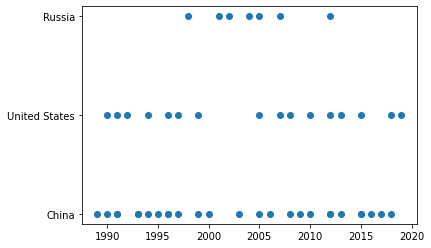

In [117]:
import matplotlib.pyplot as plt

plt.scatter(x=X_test.Year,y=y_test_pred)

In [119]:
fig_scatter3d_predict=px.scatter_3d(X_test,x="Oil - Proved reserves",y="Gas - Proved reserves",
    z="Armed forces personnel, total",opacity=0.4,hover_name="Year",height=700,
    title="Reservas Probadas de Aceite y Gas del Top "+str(len(df_afp_topN["Code"].unique()))+" de países con mayor Fuerza Militar")
    #NOTA: Podemos agregar un atributo llamado text="Year" en la gráfica para que se muestren los años 
    # y se vea guapeton, la contra es que es mucha info para mostrar en una sola imágen
fig_scatter3d_predict.show()

A partir de aquí me di cuenta que la estaba regando y necesito PREDECIR para un solo país, por lo que procedo a extraer los datos de un solo país y evaluarlo en el tiempo

In [209]:
list_countries=["United States","China","Mexico","Argentina","Russia"]
predict_varios=df_all.where(df_all.Entity.isin(list_countries)).dropna()
predict_varios.head()

,Entity,Code,Year,"Armed forces personnel, total",military_expenditure,military_expenditure_per_capita,Gas - Proved reserves,Oil - Proved reserves
150,Argentina,ARG,1989.0,95000.0,5.308451e+09,44.82,6.542250e+11,2.167700e+09
151,Argentina,ARG,1990.0,85000.0,3.605015e+09,62.88,6.435000e+11,1.569987e+09
152,Argentina,ARG,1991.0,70000.0,3.617332e+09,86.42,6.269250e+11,1.683267e+09
153,Argentina,ARG,1992.0,65000.0,3.425276e+09,97.06,5.274750e+11,2.017438e+09
154,Argentina,ARG,1993.0,65000.0,3.232102e+09,99.16,5.040750e+11,2.216787e+09


In [210]:
#Seperamos en X e y
X = predict_varios.drop(["Code","Entity"], axis=1) #Elimino de mi dataset la variable a predecir
y = predict_varios[["Entity"]] #Defino el Target

In [212]:
X.head()

,Year,"Armed forces personnel, total",military_expenditure,military_expenditure_per_capita,Gas - Proved reserves,Oil - Proved reserves
150,1989.0,95000.0,5.308451e+09,44.82,6.542250e+11,2.167700e+09
151,1990.0,85000.0,3.605015e+09,62.88,6.435000e+11,1.569987e+09
152,1991.0,70000.0,3.617332e+09,86.42,6.269250e+11,1.683267e+09
153,1992.0,65000.0,3.425276e+09,97.06,5.274750e+11,2.017438e+09
154,1993.0,65000.0,3.232102e+09,99.16,5.040750e+11,2.216787e+09


In [213]:
y.head()

,Entity
150,Argentina
151,Argentina
152,Argentina
153,Argentina
154,Argentina


In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
tree = DecisionTreeClassifier(max_depth=3, random_state = 123) #Creamos el modelo
tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_train_pred

array(['Russia', 'China', 'China', 'Argentina', 'Argentina', 'China',
       'China', 'China', 'Russia', 'China', 'China', 'Russia', 'China',
       'Mexico', 'Mexico', 'Argentina', 'China', 'Mexico', 'Argentina',
       'Argentina', 'Mexico', 'Russia', 'Russia', 'Mexico', 'Russia',
       'China', 'Mexico', 'Argentina', 'Argentina', 'Russia', 'Russia',
       'Russia', 'China', 'China', 'China', 'China', 'China', 'Argentina',
       'China', 'China', 'China', 'Argentina', 'China', 'Russia', 'China',
       'Argentina', 'Mexico', 'China', 'Russia', 'Argentina', 'Argentina',
       'Mexico', 'Argentina', 'Mexico', 'Russia', 'Argentina', 'Russia',
       'Argentina', 'Argentina', 'Mexico', 'Argentina', 'Argentina',
       'China', 'China', 'Mexico', 'Mexico', 'Mexico', 'Argentina',
       'China', 'Mexico', 'China', 'China', 'Argentina', 'Russia',
       'Mexico', 'Russia', 'Russia', 'China', 'Mexico', 'Russia',
       'Russia', 'Argentina', 'China', 'China', 'China', 'China', 'China',
 

In [219]:
y_test_pred = tree.predict(X_test) #Prediccion en Test
y_test_pred

array(['China', 'Mexico', 'China', 'Argentina', 'Mexico', 'China',
       'China', 'China', 'China', 'China', 'Mexico', 'Argentina', 'China',
       'Mexico', 'China', 'Mexico', 'China', 'China', 'Argentina',
       'Mexico', 'Argentina', 'Russia', 'China', 'China', 'Mexico',
       'China', 'Argentina', 'China', 'Russia', 'Russia', 'China',
       'Argentina', 'China', 'Mexico', 'Argentina', 'China', 'Argentina',
       'Mexico'], dtype=object)

In [220]:
print("Porcentaje de número de datos para testear: "+str(round(len(X_test)/len(X)*100,2))+"%")

Porcentaje de número de datos para testear: 25.17%


In [221]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8053097345132744
% de aciertos sobre el set de evaluación: 0.7631578947368421


In [222]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[8 0 0 0 0]
 [0 9 0 0 0]
 [0 0 9 0 0]
 [0 0 0 3 0]
 [0 9 0 0 0]]


Se observó que si se aumenta la profundidad del arbol, el algoritmo comienza a hacer overfitting, por lo que se deja en profundidad máxima de 3

NOTA: Hacer clasificación por país (por rama) y hacer test de predicción